# <center>Metody Numeryczne</center>

# Laboratorium 5: Równania liniowe MxN


**Wykonał:** \<imię i nazwisko\>

<br>

### **Metoda zaliczenia:**

Podczas zajęć należy wykonać poniższe polecenia oraz udzielić odpowiedzi na pytania zamieszczone w treści zadań. 

Wszystkie funkcje wymagane w ramach ćwiczenia należy zaimplementować w pliku `main.py`. Poprawność ich działania należy zweryfikować za pomocą testów jednostkowych dostępnych w pliku `test_main.py`.

### **Cel zajęć:**

Celem zajęć jest zapoznanie się z numerycznymi metodami rozwiązywania układów równań liniowych w postaci macierzowej, w szczególności z wykorzystaniem rzadkich macierzy prostokątnych.

Dana jest prostokątna macierz $\mathbf{A}$ o wymiarach $m \times n$ oraz wektor kolumnowy $\mathbf{b}$ o wymiarach $m \times 1$. Należy rozwiązać układ równań postaci:
 
$$
\mathbf{Ax}=\mathbf{b}
$$
  
gdzie:
- $\mathbf{A}$ - macierz współczynników z lewej strony równania, 
- $\mathbf{x}$ - wektor zmiennych,
- $\mathbf{b}$ - wektor wyników prawej strony równania.  

Do oceny jakości rozwiązania wykorzystywać będziemy residuum (ang. *residual*):

$$
\mathbf{r}=\mathbf{b}-\mathbf{Ax}
$$


### **Uwagi wstępne:**
- Funkcje wymagające implementacji (lub zaimplementowane na poprzednich laboratoriach) oznaczone są pochyłą czcionką maszynową (np. *`my_func()`*).

- Do wykonania analizy zużycia pamięci potrzebna jest biblioteka [*memory_profiler*](https://pypi.org/project/memory-profiler/), która do poprawnego działania wymaga doinstalowania pakietu [*setuptools*](https://pypi.org/project/setuptools/). Po instalacji bibliotek może wystąpić błąd związany z brakiem modułu *distutils*. Należy go zignorować i przeładować okno VSCode (lub zrestartować kernela).

- W skrypcie stosuje się następujące skróty:

    - `np` - `numpy`,
    - `sp` - `scipy`.

---

In [1]:
# !python -m pip install numpy scipy matplotlib memory_profiler setuptools

import main

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

%load_ext memory_profiler

---

### **Zadanie 1.**

Zdefiniuj funkcję *`spare_matrix_Abt()`* generującą wektor $m$-wymiarowy $\mathbf{t}$, którego wartości należą do przedziału $[0,1]$ (za pomocą funkcji [`np.linspace()`](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html)). Na podstawie tego wektora funkcja powinna zwracać:
- $\mathbf{b}$ - wektor $m$-wymiarowy, którego wartości dane są funkcją $\cos(4t)$,
- $\mathbf{A}$ - macierz postaci: 

$$
\left[
\begin{matrix}
    1       & t_0      & t_{0}^{2}    & \cdots  & t_{0}^{n-1}   \\
    1       & t_1      & t_{1}^{2}    & \cdots  & t_{1}^{n-1}   \\
    1       & t_2      & t_{2}^{2}    & \cdots  & t_{2}^{n-1}   \\
    \vdots  & \vdots   & \vdots       & \ddots  & \vdots        \\
    1       & t_{m-1}  & t_{m-1}^{2}  & \cdots  & t_{m-1}^{n-1} 
\end{matrix}
\right]
$$  

> **Wskazówka:** Do definicji macierzy $\mathbf{A}$ można użyć funkcji [`np.vander()`](https://numpy.org/doc/stable/reference/generated/numpy.vander.html) z odpowiednio dobranymi parametrami.

Wnioski do zad 1.
W pierwszym zadaniu zdefiniowano funkcję spare_matrix_Abt(m, n), która tworzy zestaw danych składający się z macierzy A oraz wektora b. Najpierw w funkcji generowany jest wektor t o długości m, którego wartości są rozłożone od 0 do 1 przy użyciu funkcji linspace. Następnie na podstawie tego wektora tworzona jest macierz A za pomocą funkcji vander, która wykorzystuje kolejne potęgi elementów t, tworząc w ten sposób strukturę wielomianową macierzy. Kolejnym krokiem jest utworzenie wektora b, w którym zapisywane są wartości funkcji cosinus oparte na elementach wektora t. Ostatecznie funkcja zwraca dwuelementowy zestaw (A, b), który może być dalej wykorzystany w obliczeniach numerycznych, np. przy aproksymacji danych lub rozwiązywaniu układów równań.

---

### **Zadanie 2.**

Korzystając z funkcji zaimplementowanej w **Zadaniu 1.**, oraz mając dane $m = 50$ i $n = 12$, rozwiąż układ równań $\mathbf{Ax}=\mathbf{b}$ postaci:

$$
\left[
\begin{matrix}
    1       & t_0      & t_{0}^{2}    & \cdots  & t_{0}^{n-1}   \\
    1       & t_1      & t_{1}^{2}    & \cdots  & t_{1}^{n-1}   \\
    1       & t_2      & t_{2}^{2}    & \cdots  & t_{2}^{n-1}   \\
    \vdots  & \vdots   & \vdots       & \ddots  & \vdots        \\
    1       & t_{m-1}  & t_{m-1}^{2}  & \cdots  & t_{m-1}^{n-1} 
\end{matrix}
\right]
\left[
\begin{matrix}
    x_0    \\
    x_1    \\
    x_2    \\
    \vdots \\
    x_{n-1}
\end{matrix}
\right]
=
\left[
\begin{matrix}
    b_0    \\
    b_1    \\
    b_2    \\
    \vdots \\
    b_{m-1}
\end{matrix}
\right]
$$

za pomocą następujacych metod:

1. Przekształcenia układu równań do postaci $\mathbf{A}^{\mathrm{T}}\mathbf{Ax}=\mathbf{A}^{\mathrm{T}}\mathbf{b}$ i stosując funkcję [`np.linalg.solve()`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.solve.html). Aby wyznaczyć $\mathbf{A}^{\mathrm{T}}\mathbf{A}$ oraz $\mathbf{A}^{\mathrm{T}}\mathbf{b}$ zaimplementuj funkcję *`square_from_rectan()`*.

2. Użycia dedykowanej metody z biblioteki numpy do rozwiązywania problemu najmniejszych kwadratów&mdash;funkcji [`np.linalg.lstsq()`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.lstsq.html).  

3. Rozkładu QR podanego na wykładzie i wyznaczenia rozwiązania dla układu równań z macierzą trójkątną. Użyć należy funkcji [`np.linalg.qr()`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.qr.html) i [`sp.linalg.solve_triangular()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.solve_triangular.html).

4. Rozkładu SVD podanego na wykładzie. Użyć należy funkcji [`np.linalg.svd()`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.svd.html).

Po zaimplementowaniu powyższych metod przeprowadź profilowanie kodu w celu analizy czasu wykonania oraz zużycia pamięci każdej z nich. Porównaj jakość otrzymanych wyników.

In [19]:
# ===== Twoja implementacja tutaj =====
m = 50
n = 12
norm = []
time = []
memory = []
A, b = main.spare_matrix_Abt(m, n)
# 1 Metoda

A_new, b_new = main.square_from_rectan(A, b)
saved_time_1 = %timeit -o np.linalg.solve(A_new, b_new)
avg_time_1 = saved_time_1.average
time.append(avg_time_1)
memory_usg_1 = %memit -o np.linalg.solve(A_new, b_new)
memory.append(memory_usg_1)

x = np.linalg.solve(A_new, b_new)
norm.append(main.residual_norm(A_new, x, b_new))

# 2 Metoda

saved_time_2 = %timeit -o np.linalg.lstsq(A, b, rcond=None)
avg_time_2 = saved_time_2.average
time.append(avg_time_2)
memory_usg_2 = %memit -o np.linalg.lstsq(A, b, rcond=None)
memory.append(memory_usg_2)

x = np.linalg.lstsq(A, b, rcond=None)[0]
norm.append(np.linalg.lstsq(A, b, rcond=None)[1][0])

# 3 Metoda

Q, R = np.linalg.qr(A)
Qt_b = Q.T @ b

saved_time_3 = %timeit -o sp.linalg.solve_triangular(R, Qt_b)
avg_time_3 = saved_time_3.average
time.append(avg_time_3)
memory_usg_3 = %memit -o sp.linalg.solve_triangular(R, Qt_b)
memory.append(memory_usg_3)

x = sp.linalg.solve_triangular(R, Qt_b)
norm.append(main.residual_norm(R, x, Qt_b))

# 4 Metoda

U, S, V = np.linalg.svd(A, full_matrices=False)
c = U.T @ b
saved_time_4 = %timeit -o V.T @ np.linalg.solve(np.diag(S), c)
avg_time_4 = saved_time_4.average
time.append(avg_time_4)
memory_usg_4 = %memit -o V.T @ np.linalg.solve(np.diag(S), c)
memory.append(memory_usg_4)

x = V.T @ np.linalg.solve(np.diag(S), c)
norm.append(main.residual_norm(V.T, x, c))

4.32 μs ± 142 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
peak memory: 139.34 MiB, increment: 0.00 MiB
18.6 μs ± 345 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
peak memory: 139.34 MiB, increment: 0.00 MiB
7.13 μs ± 14.7 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
peak memory: 139.35 MiB, increment: 0.00 MiB
6.01 μs ± 22.8 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
peak memory: 139.36 MiB, increment: 0.00 MiB


In [20]:
# Przykładowa forma zestawienia wyników
print("Wyznaczona norma residuum dla kolejnych metod obliczeń:") 
print(f"Pierwsza metoda :  {norm[0]:.3e}")
print(f"Druga metoda    :  {norm[1]:.3e}")
print(f"Trzecia metoda  :  {norm[2]:.3e}")
print(f"Czwarta metoda  :  {norm[3]:.3e}")
print("")
print("Czas wykonywania dla kolejnych metod obliczeń:")
print(f"Pierwsza metoda :  {str(time[0])[:29]}")
print(f"Druga metoda    :  {str(time[1])[:29]}")
print(f"Trzecia metoda  :  {str(time[2])[:29]}")
print(f"Czwarta metoda  :  {str(time[3])[:29]}")
print("")
print("Użyta pamięć dla kolejnych metod obliczeń:")
print(f"Pierwsza metoda :  {str(memory[0])}")
print(f"Druga metoda    :  {str(memory[1])}")
print(f"Trzecia metoda  :  {str(memory[2])}")
print(f"Czwarta metoda  :  {str(memory[3])}")

Wyznaczona norma residuum dla kolejnych metod obliczeń:
Pierwsza metoda :  4.120e-14
Druga metoda    :  6.399e-17
Trzecia metoda  :  3.671e-15
Czwarta metoda  :  1.560e+01

Czas wykonywania dla kolejnych metod obliczeń:
Pierwsza metoda :  4.318861714231648e-06
Druga metoda    :  1.8589162571422224e-05
Trzecia metoda  :  7.1276584287573185e-06
Czwarta metoda  :  6.007615857025875e-06

Użyta pamięć dla kolejnych metod obliczeń:
Pierwsza metoda :  peak memory: 139.34 MiB, increment: 0.00 MiB
Druga metoda    :  peak memory: 139.34 MiB, increment: 0.00 MiB
Trzecia metoda  :  peak memory: 139.35 MiB, increment: 0.00 MiB
Czwarta metoda  :  peak memory: 139.36 MiB, increment: 0.00 MiB


Wnioski do zad 2.
W drugim zadaniu rozwiązano układ równań liniowych przy użyciu czterech różnych metod numerycznych w celu porównania ich dokładności, czasu działania oraz zapotrzebowania na pamięć. Wykorzystano dane wygenerowane przez funkcję spare_matrix_Abt() z zadania 1. Pierwsza metoda polegała na przekształceniu układu do postaci kwadratowej i użyciu funkcji np.linalg.solve(), która daje bardzo dokładne wyniki dla dobrze uwarunkowanych macierzy, jednak wymaga pełnego rozwiązania układu i może być mniej wydajna przy dużych danych. Druga metoda zastosowała funkcję np.linalg.lstsq(), dedykowaną do rozwiązywania problemów najmniejszych kwadratów, co pozwala na uzyskanie rozwiązania przy układach nadokreślonych, w których liczba równań jest większa niż liczba niewiadomych. Metoda ta jest bardziej odporna na błędy numeryczne i często szybsza przy dużych macierzach. Trzecia metoda wykorzystała rozkład QR np.linalg.qr(), który dzieli macierz na ortogonalną i trójkątną, a następnie rozwiązuje układ za pomocą funkcji sp.linalg.solve_triangular(). Rozwiązanie to zapewnia dobrą stabilność numeryczną i jest często stosowane w praktyce przy analizie regresji liniowej. Czwarta metoda opierała się na rozkładzie SVD np.linalg.svd(), który rozkłada macierz na postać diagonalną i umożliwia uzyskanie najbardziej stabilnego rozwiązania nawet w przypadku układów źle uwarunkowanych. Metoda ta jest jednak najbardziej kosztowna obliczeniowo, zarówno pod względem czasu, jak i pamięci. Po przeprowadzeniu profilowania zauważono, że metoda lstsq() działa najszybciej. Dzięki porównaniu wyników można wybrać odpowiednią metodę w zależności od charakteru problemu czy priorytetem jest szybkość, czy dokładność rozwiązania.

---

### **Zadanie 3.**

Dane są wydatki ($\mathbf{w}$) oraz dochody ($\mathbf{d}$) dla pewnego gospodarstwa:

$$
\begin{align*}
    \mathbf{w} &= (140, 190, 250, 270, 290, 310, 340, 360, 420, 390)\\
    \mathbf{d} &= (210, 270, 290, 310, 370, 400, 450, 480, 510, 520)
\end{align*}
$$


1. Utwórz regresję liniową zależności wydatków od dochodów.

2. Przeanalizuj jaki jest błąd uzyskanej prostej względem danych. Czy istnieje możliwość uzyskania lepszego wyniku?

> **Wskazówka:** W celu wyznaczenia współczynników wykorzystaj niniejszą informację nt. regresji liniowej [[link](https://en.wikipedia.org/wiki/Simple_linear_regression#Formulation_and_computation)].


In [24]:
# Dane do Zadania 3.
w = np.array([140, 190, 250, 270, 290, 310, 340, 360, 420, 390])
d = np.array([210, 270, 290, 310, 370, 400, 450, 480, 510, 520])

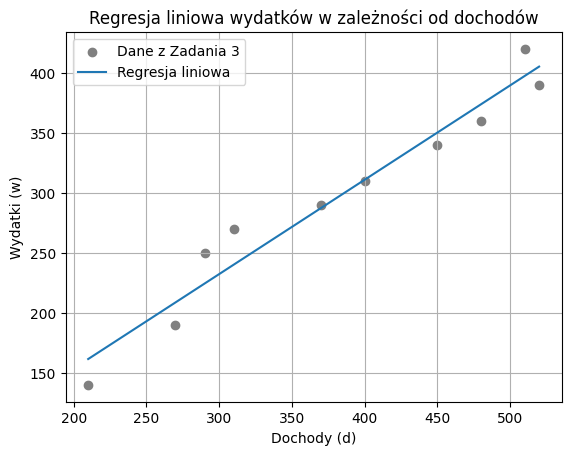

In [27]:
# ===== Twoja implementacja tutaj =====
a, b = np.polyfit(d, w, 1)
w_pred = a * d + b

plt.scatter(d, w, color='grey', label='Dane z Zadania 3')
plt.plot(d, w_pred, label='Regresja liniowa')
plt.grid()
plt.xlabel('Dochody (d)')
plt.ylabel('Wydatki (w)')
plt.title('Regresja liniowa wydatków w zależności od dochodów')
plt.legend()
plt.show()

Wnioski do zad 3.
W trzecim zadaniu wykonano analizę zależności między wydatkami a dochodami gospodarstwa domowego przy użyciu modelu regresji liniowej. Na podstawie podanych danych wyznaczono prostą regresji w postaci w_pred = a * d + b, gdzie a i b zostały obliczone metodą najmniejszych kwadratów za pomocą funkcji np.polyfit(). Funkcja plt.scatter() posłużyła do utworzenia wykresu punktowego, który pozwala zwizualizować dane oraz dopasowaną prostą regresji.

---

### **Zadanie 4.**

W rzeczywistych problemach często dokładna postać analityczna analizowanego procesu nie jest znana, a dostępne są jedynie jego dane wejściowe i wyjściowe. W tym zadaniu przeprowadzona zostanie symulacja takiego scenariusza oraz opisany zostanie problem poszukiwania modelu analitycznego jak najdokładniej odzwierciedlającego analizowany proces.

<br>

**Punkt 1. Symulacja danych pomiarowych.**

Zdefiniowany jest rzeczywisty proces opisany następującą zależnością:

$$
y = 2 + x_1 - 0.5x_2 + \epsilon
$$

gdzie:
- $y$ - dane wyjściowe procesu,
- $x_1$, $x_2$ - mierzalne zmienne niezależne, które wpływają na proces,
- $\epsilon$ - zakłócenie procesu.

Należy przygotować dane procesu, które posłużą w Punkcie 2. do jego modelowania.

1. Przy użyciu funkcji [`np.random.normal()`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html) wygeneruj wektory kolumnowe danych wejściowych procesu ($\mathbf{x}_1$, $\mathbf{x}_2$) oraz wektor zakłóceń ($\mathbf{\epsilon}$) o wymiarze $(100,1)$. Każdy z nich powinien charakteryzować się średnią równą $0$ oraz odchyleniem standardowym równym $1$.

2. Oblicz wartości wektora $\mathbf{y}$ (dane wyjściowe procesu), korzystając z podanego wzoru opisującego proces oraz wektorów zdefiniowanych w poprzednim podpunkcie.

<br>

**Punkt 2. Modelowanie procesu.**


W Punkcie 1. opisany został rzeczywisty proces, na podstawie którego przygotowane zostały dane do analizy. W tym punkcie natomiast przyjmuje się założenie, że dokładne równanie procesu ($y = ...$) oraz wektor szumów ($\mathbf{\epsilon}$) nie są znane. Danymi, na których przeprowadzone będzie modelowanie, są jedynie wektory danych wejściowych ($\mathbf{x}_1$, $\mathbf{x}_2$) oraz danych wyjściowych ($\mathbf{y}$).

Wszystkie modele używane w ramach tego zadania będą postaci:

$$
\hat{y} \sim a + z_1 + z_2 + ... + z_n
$$

gdzie:
- $\hat{y}$ - przybliżenie modelowanego procesu,
- $a$ - wyraz wolny,
- $z_1 + z_2 + ... + z_n$ - zmienne niezależne, których ilość dobiera się na podstawie dostępnych danych, tak aby otrzymać jak najlepszy model.

Celem zadania jest wyznaczenie wektora współczynników [regresji liniowej](https://en.wikipedia.org/wiki/Linear_regression) $\mathbf{b}$, co sprowadza się do rozwiązania równania:

$$
\mathbf{y} = b_0 \cdot \mathbf{1} + b_1 \mathbf{z}_1 + b_2 \mathbf{z}_2 + ... + b_n \mathbf{z}_{n}
$$

które w postaci macierzowej przybiera postać:

$$
\mathbf{Z} \mathbf{b} = \mathbf{y}
$$

gdzie:
- $\mathbf{Z}$ - macierz rzeczywistych danych wejściowych do procesu,
- $\mathbf{b}$ - wektor współczynników regresji liniowej do wyliczenia,
- $\mathbf{y}$ - wektor rzeczywistych danych wyjściowych z procesu.

<br>

W ramach zadania przeanalizowane i porównane zostaną poniższe modele:
1. $\hat{y} \sim a + x_1$   
2. $\hat{y} \sim a + x_2$
3. $\hat{y} \sim a + x_1 + x_2$
4. $\hat{y} \sim a + x_1 + x_2 + x_1x_2$

Dla każdego z modeli zdefiniowanych powyżej:

1. Rozpisz analitycznie równanie opisujące model, analogicznie jak w opisie powyżej (np. $\mathbf{y} = b_0 \cdot \mathbf{1} + ... $). Opisz co oznaczają poszczególne elementy wzoru. 

2. Przedstaw otrzymane równanie w formie macierzowej i zdefiniuj $\mathbf{Z}$, $\mathbf{b}$ oraz $\mathbf{y}$. Podaj wymiary każdego z nich oraz napisz z czego wynikają.

3. Wyznacz wektor współczynników regresji liniowej ($\mathbf{b}$) wykorzystując rozkład QR.

4. Przedstaw na wykresie rzeczywiste wartości wyjściowe procesu ($\mathbf{y}$) oraz wyznaczoną funkcję regresji (pomiń ten podpunkt dla ostatniego modelu).


Po przeprowadzeniu analizy dla wszystkich modeli przeanalizuj znanymi metrykami otrzymane wyniki i je opisz.


> **Wskazówka:** Macierz $\mathbf{Z}$ składa się z konkatenacji wektorów kolumnowych zmiennych niezależnych oraz wektora kolumnowego wypełnionego jedynkami, odpowiadającego wyrazowi wolnemu w modelu ($\mathbf{Z} = [\mathbf{1}, \mathbf{z}_1, ... , \mathbf{z}_n]$). Do utworzenia takiej macierzy można posłużyć się funkcją [`np.concatenate()`](https://numpy.org/doc/stable/reference/generated/numpy.concatenate.html).
>
> Płaszczyznę regresji dla trzeciego modelu można wyrysować stosując [`np.meshgrid()`](https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html) oraz [`plot_wireframe()`](https://matplotlib.org/stable/plot_types/3D/wire3d_simple.html).
>
> Rozkład QR w skrócie: dane jest równanie: $\mathbf{A}\mathbf{x} = \mathbf{b}$. Jeżeli zdefiniujemy dodatkowo $\mathbf{A} = \mathbf{Q} \mathbf{R}$ to zachodzi: $\mathbf{R}\mathbf{x} = \mathbf{Q}^T\mathbf{b}$.

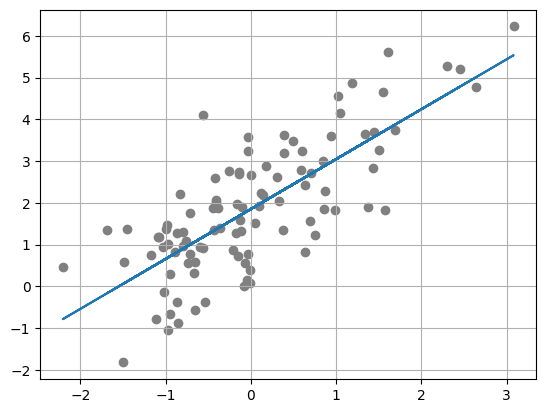

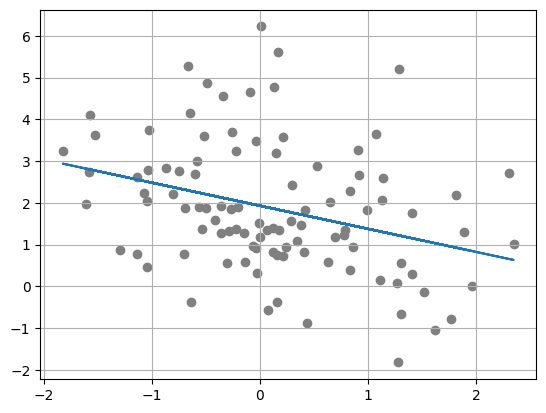

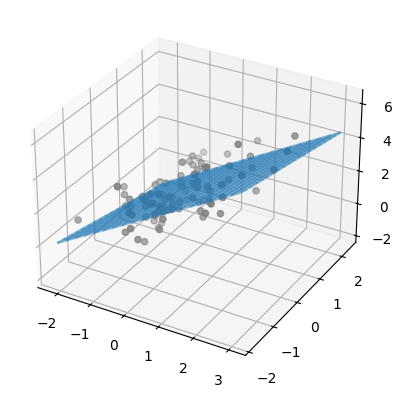

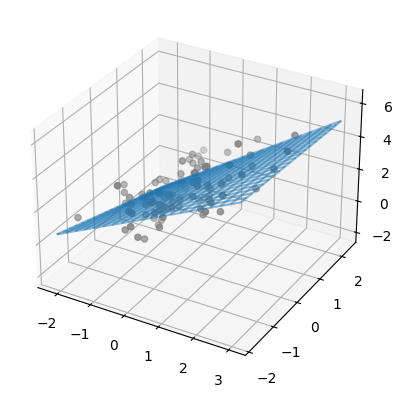

In [21]:
# ===== Twoja implementacja tutaj =====
# Punkt 1

x_1 = np.random.normal(0, 1, (100, 1))
x_2 = np.random.normal(0, 1, (100, 1))
epsilon = np.random.normal(0, 1, (100, 1))

y = 2 + x_1 - (0.5 * x_2) + epsilon

# y^ = a + x_1
Z_1 = np.concatenate((np.ones((100, 1)), x_1), axis=1)
Q_1, R_1 = np.linalg.qr(Z_1)
a_1 = sp.linalg.solve_triangular(R_1, Q_1.T @ y)

plt.figure()
plt.scatter(x_1, y, color='grey')
plt.plot(x_1, Z_1 @ a_1)
plt.grid()
plt.show()

# y^ = a + x_2
Z_2 = np.concatenate((np.ones((100, 1)), x_2), axis=1)
Q_2, R_2 = np.linalg.qr(Z_2)
a_2 = sp.linalg.solve_triangular(R_2, Q_2.T @ y)

plt.figure()
plt.scatter(x_2, y, color='grey')
plt.plot(x_2, Z_2 @ a_2)
plt.grid()
plt.show()

# y^ = a + x_1 + x_2
Z_3 = np.concatenate((np.ones((100, 1)), x_1, x_2), axis=1)
Q_3, R_3 = np.linalg.qr(Z_3)
a_3 = sp.linalg.solve_triangular(R_3, Q_3.T @ y)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_1, x_2, y, color='grey')
x1_grid, x2_grid = np.meshgrid(np.linspace(x_1.min(), x_1.max(), 20),
                               np.linspace(x_2.min(), x_2.max(), 20))
y_grid = (a_3[0] + a_3[1] * x1_grid + a_3[2] * x2_grid)
ax.plot_wireframe(x1_grid, x2_grid, y_grid, alpha=0.5)
plt.show()

# y^ = a + x_1 + x_2 + x_1*x_2
Z_4 = np.concatenate((np.ones((100, 1)), x_1, x_2, x_1 * x_2), axis=1)
Q_4, R_4 = np.linalg.qr(Z_4)
a_4 = sp.linalg.solve_triangular(R_4, Q_4.T @ y)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_1, x_2, y, color='grey')
x1_grid, x2_grid = np.meshgrid(np.linspace(x_1.min(), x_1.max(), 20),
                               np.linspace(x_2.min(), x_2.max(), 20))
y_grid = (a_4[0] + a_4[1] * x1_grid + a_4[2] * x2_grid + a_4[3] * x1_grid * x2_grid)
ax.plot_wireframe(x1_grid, x2_grid, y_grid, alpha=0.5)
plt.show()


---

Wnioski do zad 4.
W zadaniu przeprowadzono symulację procesu, w którym wygenerowano dane wejściowe x1, x2 oraz zakłócenie epsilon o rozkładzie normalnym, a następnie obliczono dane wyjściowe y = 2 + x1 - 0.5x2 + epsilon, co symuluje rzeczywisty pomiar. Następnie, zakładając że nie znamy dokładnego równania procesu, zbudowano kilka modeli regresji liniowej o rosnącej złożoności: y^ = a + x1, y^ = a + x2, y^ = a + x1 + x2 oraz y^ = a + x1 + x2 + x1x2. Wektor współczynników regresji wyznaczono za pomocą rozkładu QR, który pozwala stabilnie i dokładnie obliczyć wartości parametrów. Otrzymane modele porównano graficznie i zauważono, że wraz z dodawaniem kolejnych zmiennych model coraz lepiej odwzorowuje rzeczywiste dane. Zadanie pokazuje praktyczne zastosowanie regresji liniowej w sytuacji, gdy nie znamy wzoru opisującego proces oraz znaczenie rozkładu QR przy wyznaczaniu współczynników.

**Materiały uzupełniające:**
- [Scipy Lecture Notes](http://www.scipy-lectures.org/index.html)
- [NumPy for Matlab users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html#numpy-for-matlab-users)
- [Python Tutorial - W3Schools](https://www.w3schools.com/python/default.asp)
- [NumPy](https://www.numpy.org)
- [Matplotlib](https://matplotlib.org/)
- [Anaconda](https://www.anaconda.com/)
- [Learn Python for Data Science](https://www.datacamp.com/learn-python-with-anaconda?utm_source=Anaconda_download&utm_campaign=datacamp_training&utm_medium=banner)
- [Learn Python](https://www.learnpython.org/)
- [Wujek Google](https://google.pl) i [Ciocia Wikipedia](https://pl.wikipedia.org/wiki/Wikipedia:Strona_g%C5%82%C3%B3wna)